In [1]:
Quote = ("Commit to the Lord whatever you do, and he will establish your plans.")
Book = (" Proverbs 16:3")
print(Quote + Book)
print("Notebook written by Milton Abreu! Date: 2020 - 06 - 01")

Commit to the Lord whatever you do, and he will establish your plans. Proverbs 16:3
Notebook written by Milton Abreu! Date: 2020 - 06 - 01


In [2]:
# Libraries
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Loading the data and taking a first look
premise1 = pd.read_csv("Hourly_Aksum.csv") # Aksum Residence
premise2 = pd.read_csv("Hourly_Maps.csv") # Maps Residence
premise3 = pd.read_csv("Hourly_Songhai.csv") # Songhai Residence
ALC_Voltage = pd.read_csv("Undervoltage_Events.csv") # Undervoltage Events
#premise3.head(100) # uncomment to take a look at the first 100 rows of the data set
#premise1.columns # uncomment to take a look at the columns names

In [4]:
# Renaming a column that was wrongly labeled/named
premise1 = premise1.rename(columns={x:x.replace('Bule-Phase', 'Blue-Phase') for x in premise1.columns})
premise2 = premise2.rename(columns={x:x.replace('Bule-Phase', 'Blue-Phase') for x in premise2.columns})
premise3 = premise3.rename(columns={x:x.replace('Bule-Phase', 'Blue-Phase') for x in premise3.columns})

# Giving clear name to each column based on the premises name
premise1 = premise1.rename(columns={x:x.replace('Phase', 'Phase: Aksum') for x in premise1.columns})
premise2 = premise2.rename(columns={x:x.replace('Phase', 'Phase: Maps') for x in premise2.columns})
premise3 = premise3.rename(columns={x:x.replace('Phase', 'Phase: Songhai') for x in premise3.columns})

premise1 = premise1.rename(columns={x:x.replace('Frequence (Hz)', 'Frequency (Hz): Aksum') for x in premise1.columns})
premise2 = premise2.rename(columns={x:x.replace('Frequence (Hz)', 'Frequency (Hz): Maps') for x in premise2.columns})
premise3 = premise3.rename(columns={x:x.replace('Frequence (Hz)', 'Frequency (Hz): Songhai') for x in premise3.columns})

premise1 = premise1.rename(columns={x:x.replace('Total Active Power (kW)', 'Total Active Power (kW): Aksum') for x in premise1.columns})
premise2 = premise2.rename(columns={x:x.replace('Total Active Power (kW)', 'Total Active Power (kW): Maps') for x in premise2.columns})
premise3 = premise3.rename(columns={x:x.replace('Total Active Power (kW)', 'Total Active Power (kW): Songhai') for x in premise3.columns})

In [5]:
# Converting the date column values to a datetime data type 
premise1['Date'] = pd.to_datetime(premise1['Date'],format='%d/%m/%Y %H:%M')
premise2['Date'] = pd.to_datetime(premise2['Date'],format='%d/%m/%Y %H:%M')
premise3['Date'] = pd.to_datetime(premise3['Date'],format='%d/%m/%Y %H:%M')
#premise3['Date'] # Uncomment to check it out

# Data on hourly basis
Premise_1_hour = premise1.groupby(premise1.Date.dt.time).mean()
Premise_2_hour = premise2.groupby(premise1.Date.dt.time).mean()
Premise_3_hour = premise3.groupby(premise1.Date.dt.time).mean()


In [6]:
# Subsetting the data into three groups: Voltage, Current and Frequency

# Getting the voltage
V_1 = Premise_1_hour.filter(['Voltage Red-Phase: Aksum (V)','Voltage White-Phase: Aksum (V)','Voltage Blue-Phase: Aksum (V)'], axis = 1)
V_2 = Premise_2_hour.filter(['Voltage Red-Phase: Maps (V)','Voltage White-Phase: Maps (V)','Voltage Blue-Phase: Maps (V)'], axis = 1)
V_3 = Premise_3_hour.filter(['Voltage Red-Phase: Songhai (V)','Voltage White-Phase: Songhai (V)','Voltage Blue-Phase: Songhai (V)'], axis = 1)
#Voltage.to_csv(r'C:\Users\MILTON ABREU\Documents\Data_books\Final_Analysis\Clean_Data\Voltage.csv') # save it as csv file

# Getting the current
C_1 = Premise_1_hour.filter(['Current Red-Phase: Aksum (A)','Current White-Phase: Aksum (A)','Current Blue-Phase: Aksum (A)'], axis = 1)
C_2 = Premise_2_hour.filter(['Current Red-Phase: Maps (A)','Current White-Phase: Maps (A)','Current Blue-Phase: Maps (A)'], axis = 1)
C_3 = Premise_3_hour.filter(['Current Red-Phase: Songhai (A)','Current White-Phase: Songhai (A)','Current Blue-Phase: Songhai (A)'], axis = 1)
#Current.to_csv(r'C:\Users\MILTON ABREU\Documents\Data_books\Final_Analysis\Clean_Data\Current.csv') # save it as csv file

#Getting the frequency
F_1 = Premise_1_hour.filter(['Frequency (Hz): Aksum'], axis = 1)
F_2 = Premise_2_hour.filter(['Frequency (Hz): Maps'], axis = 1)
F_3 = Premise_3_hour.filter(['Frequency (Hz): Songhai'], axis = 1)
#Frequency.to_csv(r'C:\Users\MILTON ABREU\Documents\Data_books\Final_Analysis\Clean_Data\Frequency.csv') # save it as csv file     


In [7]:
V_1.index

Index([00:00:00, 01:00:00, 02:00:00, 03:00:00, 04:00:00, 05:00:00, 06:00:00,
       07:00:00, 08:00:00, 09:00:00, 10:00:00, 11:00:00, 12:00:00, 13:00:00,
       14:00:00, 15:00:00, 16:00:00, 17:00:00, 18:00:00, 19:00:00, 20:00:00,
       21:00:00, 22:00:00, 23:00:00],
      dtype='object', name='Date')

In [8]:
# Cleaning the data
V_1 = V_1.replace(0,np.NaN); V_2 = V_2.replace(0,np.NaN); V_3 = V_3.replace(0,np.NaN) # Replace zeros with nan and then drop it
V_1.dropna(axis = 0, how ='any');V_2.dropna(axis = 0, how ='any');V_3.dropna(axis = 0, how ='any') # Getting rid of the empty cells or 'missing data'

C_1 = C_1.replace(0,np.NaN); C_2 = C_2.replace(0,np.NaN); C_3 = C_3.replace(0,np.NaN) # Replace zeros with nan and then drop it
C_1.dropna(axis = 0, how ='any');C_2.dropna(axis = 0, how ='any');C_3.dropna(axis = 0, how ='any') # Getting rid of the empty cells or 'missing data'

F_1 = F_1.replace(0,np.NaN); F_2 = F_2.replace(0,np.NaN); F_3 = F_3.replace(0,np.NaN) # Replace zeros with nan and then drop it
F_1.dropna(axis = 0, how ='any');F_2.dropna(axis = 0, how ='any');F_3.dropna(axis = 0, how ='any') # Getting rid of the empty cells or 'missing data'

F_1.eq(0).any() # Checking if there is any cell with a zero value


Series([], dtype: bool)

## POWER ANALYSIS - SECTION 0

In [9]:
#Getting the Power
P_1 = Premise_1_hour.filter(['Total Active Power (kW): Aksum','Active Power Red-Phase: Aksum (kW)','Active Power White-Phase: Aksum (kW)','Active Power Blue-Phase: Aksum (kW)'], axis = 1)
P_2 = Premise_2_hour.filter(['Total Active Power (kW): Maps', 'Active Power Red-Phase: Maps (kW)','Active Power White-Phase: Maps (kW)','Active Power Blue-Phase: Maps (kW)'], axis = 1)
P_3 = Premise_3_hour.filter(['Total Active Power (kW): Songhai','Active Power Red-Phase: Songhai (kW)','Active Power White-Phase: Songhai (kW)','Active Power Blue-Phase: Songhai (kW)'], axis = 1)
#P_1.to_csv(r'C:\Users\MILTON ABREU\Documents\Data_books\Final_Analysis\Clean_Data\Frequency.csv') # save it as csv file   

# Cleaning the data
P_1 = P_1.replace(0,np.NaN); P_2 = P_2.replace(0,np.NaN); P_3 = P_3.replace(0,np.NaN) # Replace zeros with nan and then drop it
P_1.dropna(axis = 0, how ='any');P_2.dropna(axis = 0, how ='any');P_3.dropna(axis = 0, how ='any') # Getting rid of the empty cells or 'missing data'


,Total Active Power (kW): Songhai,Active Power Red-Phase: Songhai (kW),Active Power White-Phase: Songhai (kW),Active Power Blue-Phase: Songhai (kW)
Date,,,,
00:00:00,15.247268,6.191257,5.693989,3.363934
01:00:00,14.725137,5.999454,5.481421,3.248634
02:00:00,13.951093,5.722404,5.141530,3.089071
03:00:00,13.464754,5.533333,4.928142,3.003279
04:00:00,12.602186,5.227596,4.619399,2.762568
05:00:00,12.083060,5.039617,4.436612,2.603825
06:00:00,11.506831,4.859563,4.282514,2.362295
07:00:00,11.205738,4.721585,4.176230,2.310383
08:00:00,11.378142,4.802732,4.229508,2.340984


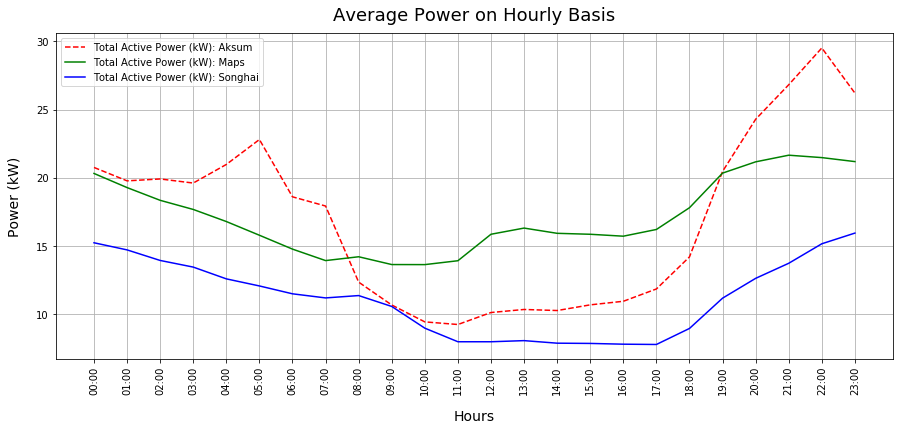

In [10]:
fig = plt.figure(figsize=(15, 6)) # Setting the right size for the graph
ax = plt.gca() # gca stands for 'get current axis'

## Monthly basis - Power graphs for sum
Premise_1_hour.plot(kind='line', y=['Total Active Power (kW): Aksum'], color=['red'],linestyle='--', ax=ax)
Premise_2_hour.plot(kind='line', y=['Total Active Power (kW): Maps'], color=['green'], ax=ax)
Premise_3_hour.plot(kind='line', y=['Total Active Power (kW): Songhai'], color=['blue'], ax=ax)

plt.title("Average Power on Hourly Basis", fontsize=18, y=1.02)
plt.xlabel("Hours", fontsize=14, labelpad=15)
plt.ylabel("Power (kW)", fontsize=14, labelpad=15)
plt.xticks(Premise_1_hour.index, rotation=90)
plt.grid(True)
#fig.savefig(r'C:\Users\MILTON ABREU\Documents\Data_books\Graphs\power_sum1.jpg')# uncomment to save the image

## VOLTAGE ANALYSIS - SECTION 1

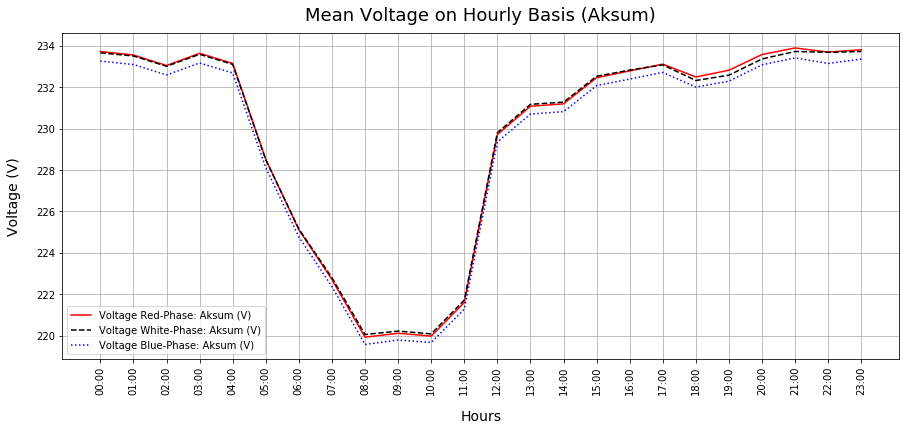

In [11]:
fig = plt.figure(figsize=(15, 6)) # Setting the right size for the graph
ax = plt.gca() # gca stands for 'get current axis'

## Monthly basis - Voltage graphs for sum
V_1.plot(kind='line', y=['Voltage Red-Phase: Aksum (V)'], color=['red'],linestyle='-', ax=ax)
V_1.plot(kind='line', y=['Voltage White-Phase: Aksum (V)'], color='black',linestyle='--', ax=ax)
V_1.plot(kind='line', y=['Voltage Blue-Phase: Aksum (V)'], color=['blue'],linestyle=':', ax=ax)
plt.title("Mean Voltage on Hourly Basis (Aksum)", fontsize=18, y=1.02)
plt.xlabel("Hours", fontsize=14, labelpad=15)
plt.ylabel("Voltage (V)", fontsize=14, labelpad=15)
plt.xticks(V_1.index, rotation=90)
plt.grid(True)
#fig.savefig(r'C:\Users\MILTON ABREU\Documents\Data_books\Graphs\Voltage_sum2.jpg')# uncomment to save the image


In [12]:
# Phase percentage of the total power consumed per premise
# Sum total of each phase devided by the sum total of all phases in that particular premise
R_phase_A = (V_1['Voltage Red-Phase: Aksum (V)'].sum()/V_1.sum().sum()) * 100 # 44.28 % of the total power
W_phase_A = (V_1['Voltage White-Phase: Aksum (V)'].sum()/V_1.sum().sum()) * 100 # 29.50 % of the total power
B_phase_A = (V_1['Voltage Blue-Phase: Aksum (V)'].sum()/V_1.sum().sum()) * 100 # 26.22 % of the total power

R_phase_M = (V_2['Voltage Red-Phase: Maps (V)'].sum()/V_2.sum().sum()) * 100 # 42.06 % of the total power
W_phase_M = (V_2['Voltage White-Phase: Maps (V)'].sum()/V_2.sum().sum()) * 100 # 35.05 % of the total power
B_phase_M = (V_2['Voltage Blue-Phase: Maps (V)'].sum()/V_2.sum().sum()) * 100 # 22.88 % of the total power

R_phase_S = (V_3['Voltage Red-Phase: Songhai (V)'].sum()/V_3.sum().sum()) * 100 # 44.80 % of the total power
W_phase_S = (V_3['Voltage White-Phase: Songhai (V)'].sum()/V_3.sum().sum()) * 100 # 37.28 % of the total power
B_phase_S = (V_3['Voltage Blue-Phase: Songhai (V)'].sum()/V_3.sum().sum()) * 100 # 17.91 % of the total power

print('Red-phase Aksum: ' + str(R_phase_A) + '%' + ' ' + 'Red-phase Maps: ' + str(R_phase_M) + '%' + ' ' + str(R_phase_S) + '%' +
     str(W_phase_A) + '%' + ' '+ str(W_phase_M) + '%' + ' '+ str(W_phase_S) + '%' + 
     str(B_phase_A) + '%' + ' '+ str(B_phase_M) + '%' + ' '+ str(B_phase_S) + '%')

Red-phase Aksum: 33.35393994458255% Red-phase Maps: 33.34237057097698% 33.352970227851785%33.35253720140178% 33.3659137761381% 33.35296032661923%33.293522854015656% 33.29171565288493% 33.294069445529004%


In [13]:
# Calculating Phase unbalance
V_1['Mean'] = V_1.mean(axis=1) # Finding the mean or average of the 3-phase current ); use rows
V_1['Max Deviation'] = V_1.max(axis=1) - V_1.mean(axis=1) # Finding the max deviation from the mean

V_2['Mean'] = V_2.mean(axis=1) # Finding the mean or average of the 3-phase current ); use rows
V_2['Max Deviation'] = V_2.max(axis=1) - V_2.mean(axis=1) # Finding the max deviation from the mean

V_3['Mean'] = V_3.mean(axis=1) # Finding the mean or average of the 3-phase current ); use rows
V_3['Max Deviation'] = V_3.max(axis=1) - V_3.mean(axis=1) # Finding the max deviation from the mean

## Phase imbalance formula
V_1['% Unbalance'] = 100 * (V_1['Max Deviation'] / V_1['Mean'])# Divide the max deviation by the mean to find the unbalance
#V_1.to_csv(r'C:\Users\MILTON ABREU\Documents\Data_books\Final_Analysis\Clean_Data\AK_Current.csv') # save it as csv file     

V_2['% Unbalance'] = 100 * (V_2['Max Deviation'] / V_2['Mean']) # Divide the max deviation by the mean to find the unbalance
#V_2.to_csv(r'C:\Users\MILTON ABREU\Documents\Data_books\Final_Analysis\Clean_Data\MA_Current.csv') # save it as csv file

V_3['% Unbalance'] = 100 * (V_3['Max Deviation'] / V_3['Mean']) # Divide the max deviation by the mean to find the unbalance
#V_3.to_csv(r'C:\Users\MILTON ABREU\Documents\Data_books\Final_Analysis\Clean_Data\SO_Current.csv') # save it as csv file


In [14]:
V_1['Max Deviation'].max()

0.2561930783242019

In [21]:
## Print the whole dataset/dataframe
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(V_3.reset_index()) # reset_index() is used to the idx and use it in the iloc function if necessary


        Date  Voltage Red-Phase: Songhai (V)  \
0   00:00:00                      232.395902   
1   01:00:00                      232.867213   
2   02:00:00                      232.360109   
3   03:00:00                      232.624590   
4   04:00:00                      232.459563   
5   05:00:00                      230.719945   
6   06:00:00                      226.994809   
7   07:00:00                      224.605464   
8   08:00:00                      224.397268   
9   09:00:00                      223.312295   
10  10:00:00                      223.822678   
11  11:00:00                      223.849454   
12  12:00:00                      231.613661   
13  13:00:00                      231.050546   
14  14:00:00                      230.522951   
15  15:00:00                      230.815027   
16  16:00:00                      231.464481   
17  17:00:00                      232.124044   
18  18:00:00                      231.813115   
19  19:00:00                      232.45

In [16]:
V_1.iloc[8:9] # Find the information regarding this idx

,Voltage Red-Phase: Aksum (V),Voltage White-Phase: Aksum (V),Voltage Blue-Phase: Aksum (V),Mean,Max Deviation,% Unbalance
Date,,,,,,
08:00:00,219.925137,220.056284,219.57377,219.85173,0.204554,0.093042


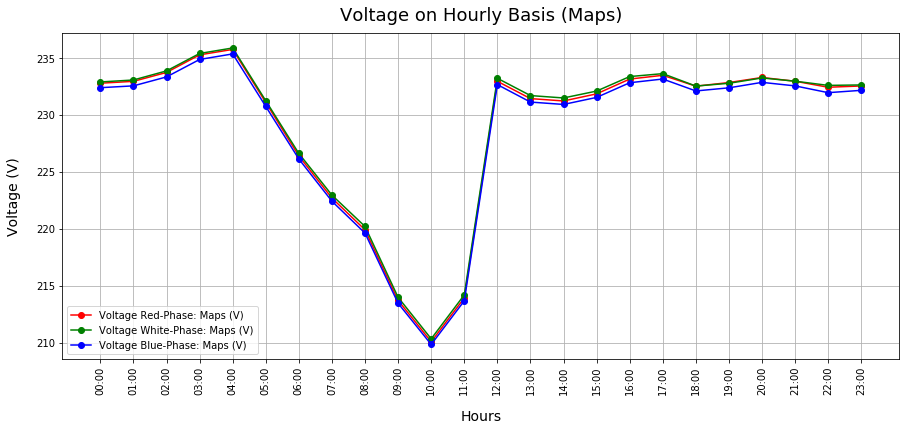

In [17]:
fig = plt.figure(figsize=(15, 6)) # Setting the right size for the graph
ax = plt.gca() # gca stands for 'get current axis'

V_2.plot(kind='line', y=['Voltage Red-Phase: Maps (V)', 'Voltage White-Phase: Maps (V)',
       'Voltage Blue-Phase: Maps (V)'], color=['red', 'green','blue'],marker='o', ax=ax)
plt.title("Voltage on Hourly Basis (Maps)", fontsize=18, y=1.02)
plt.xlabel("Hours", fontsize=14, labelpad=15)
plt.ylabel("Voltage (V)", fontsize=14, labelpad=15)
plt.xticks(V_2.index, rotation=90)
plt.grid(True)
#fig.savefig(r'C:\Users\MILTON ABREU\Documents\Data_books\Graphs\Voltage_sum2.jpg')# uncomment to save the image

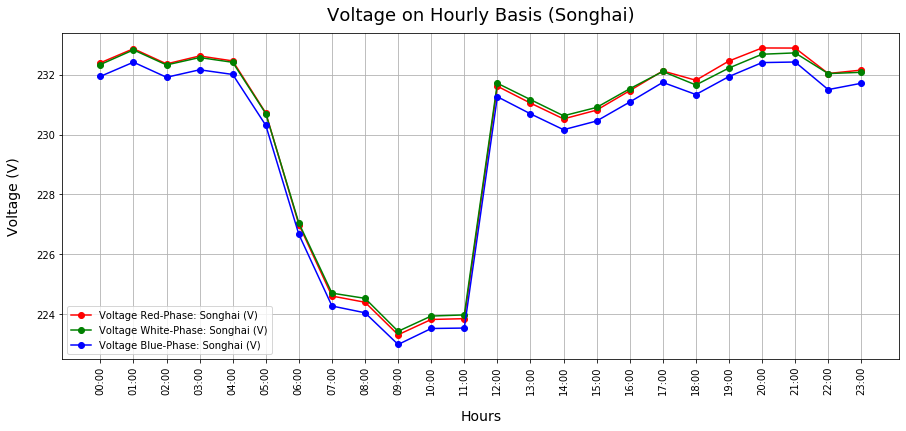

In [18]:
fig = plt.figure(figsize=(15, 6)) # Setting the right size for the graph
ax = plt.gca() # gca stands for 'get current axis

V_3.plot(kind='line', y=['Voltage Red-Phase: Songhai (V)', 'Voltage White-Phase: Songhai (V)',
       'Voltage Blue-Phase: Songhai (V)'], color=['red', 'green','blue'],marker='o', ax=ax)

plt.title("Voltage on Hourly Basis (Songhai)", fontsize=18, y=1.02)
plt.xlabel("Hours", fontsize=14, labelpad=15)
plt.ylabel("Voltage (V)", fontsize=14, labelpad=15)
plt.xticks(V_3.index, rotation=90)
plt.grid(True)
#fig.savefig(r'C:\Users\MILTON ABREU\Documents\Data_books\Graphs\Voltage_sum2.jpg')# uncomment to save the image

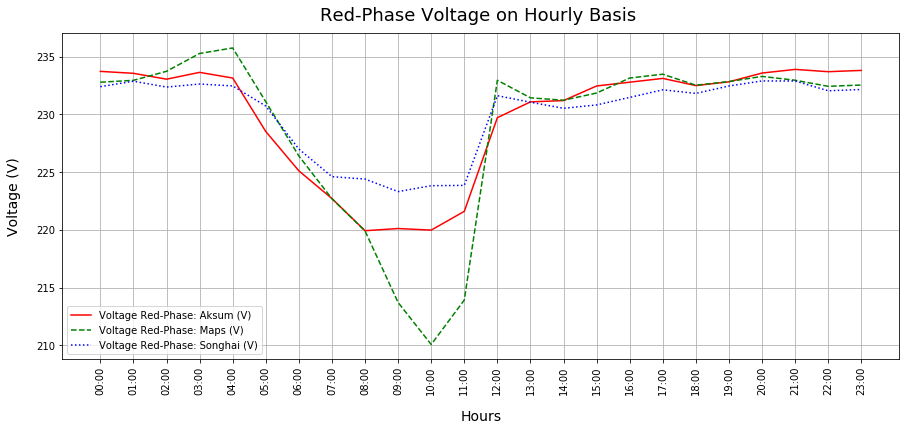

In [19]:
# Plotting and further analysis
fig = plt.figure(figsize=(15, 6)) # Setting the right size for the graph
ax = plt.gca() # gca stands for 'get current axis'

## Monthly basis - Voltage graphs for sum
V_1.plot(kind='line', y='Voltage Red-Phase: Aksum (V)', color='red',linestyle='-', ax=ax)

V_2.plot(kind='line', y='Voltage Red-Phase: Maps (V)', color='green',linestyle='--', ax=ax)

V_3.plot(kind='line', y='Voltage Red-Phase: Songhai (V)', color='blue',linestyle=':', ax=ax)


plt.title("Red-Phase Voltage on Hourly Basis ", fontsize=18, y=1.02)
plt.xlabel("Hours", fontsize=14, labelpad=15)
plt.ylabel("Voltage (V)", fontsize=14, labelpad=15)
plt.xticks(V_1.index, rotation=90)
plt.grid(True)
#fig.savefig(r'C:\Users\MILTON ABREU\Documents\Data_books\Graphs\Voltage_sum2.jpg')# uncomment to save the image

In [20]:
help(plt.plot)

Help on function plot in module matplotlib.pyplot:

plot(*args, scalex=True, scaley=True, data=None, **kwargs)
    Plot y versus x as lines and/or markers.
    
    Call signatures::
    
        plot([x], y, [fmt], *, data=None, **kwargs)
        plot([x], y, [fmt], [x2], y2, [fmt2], ..., **kwargs)
    
    The coordinates of the points or line nodes are given by *x*, *y*.
    
    The optional parameter *fmt* is a convenient way for defining basic
    formatting like color, marker and linestyle. It's a shortcut string
    notation described in the *Notes* section below.
    
    >>> plot(x, y)        # plot x and y using default line style and color
    >>> plot(x, y, 'bo')  # plot x and y using blue circle markers
    >>> plot(y)           # plot y using x as index array 0..N-1
    >>> plot(y, 'r+')     # ditto, but with red plusses
    
    You can use `.Line2D` properties as keyword arguments for more
    control on the appearance. Line properties and *fmt* can be mixed.
    The f